In [2]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString, Polygon
import bisect
import itertools

Text(0.5, 1.0, 'Imaginary Data Heatmap')

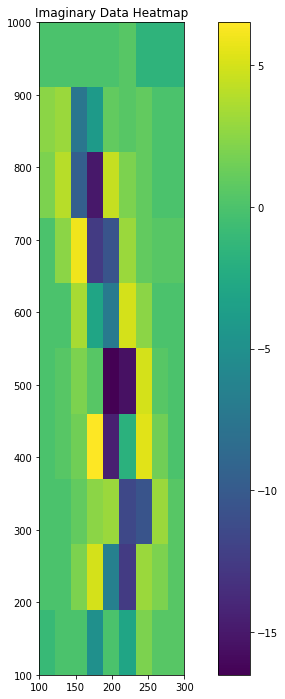

In [319]:
#Load in data from Excel spreadsheet
data=pd.read_excel('Documents/Geomag Data.xlsx',header=None)
data.columns=np.arange(100,301,25); data.index=[1000,900,800,700,600,500,400,300,200,100]

#Create heatmap
plt.figure(figsize=(12,12))
plt.imshow(data,extent=[100,300,100,1000],cmap='viridis')
plt.colorbar()
plt.title('Imaginary Data Heatmap')


Text(0.5, 1.0, 'Imaginary Data Contour Map')

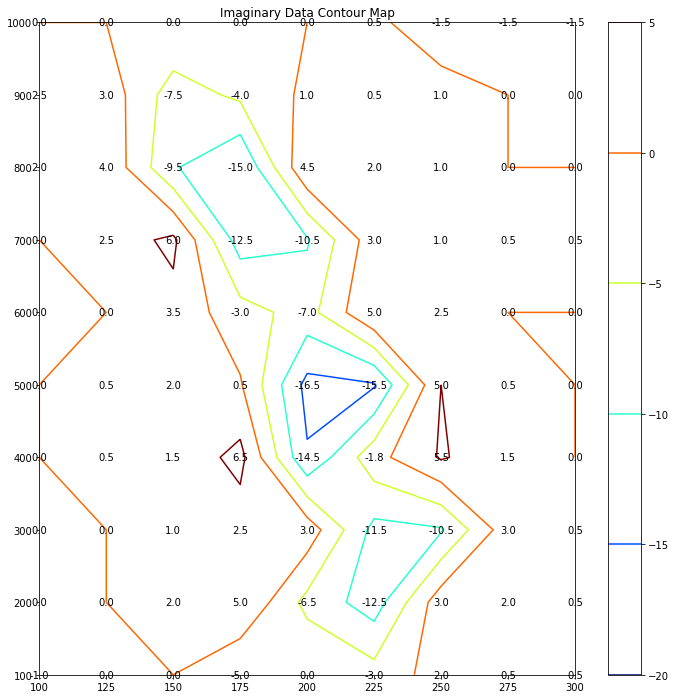

In [320]:
#Create contour map
plt.figure(figsize=(12,12))
plt.contour(np.arange(100,301,25),[1000,900,800,700,600,500,400,300,200,100],data,levels=[-20,-15,-10,-5,0,5],cmap='jet')
#Display data points
for i in data.index:
    for j in data.columns:
        plt.text(j,i,str(data.loc[i,j]),fontsize=10,horizontalalignment='center',verticalalignment='center')
plt.colorbar()
plt.title('Imaginary Data Contour Map')

In [6]:
#The following code was stolen from the Wikipedia entry on Catmull-Rom splines- this is the spline used by Excel to create
#smooth curves
import numpy
import pylab as plt

def CatmullRomSpline(P0, P1, P2, P3, nPoints=100):
    """
    P0, P1, P2, and P3 should be (x,y) point pairs that define the Catmull-Rom spline.
    nPoints is the number of points to include in this curve segment.
    """
    # Convert the points to numpy so that we can do array multiplication
    P0, P1, P2, P3 = map(numpy.array, [P0, P1, P2, P3])

    # Calculate t0 to t4
    alpha = 0.5
    def tj(ti, Pi, Pj):
        xi, yi = Pi
        xj, yj = Pj
        return (((xj-xi)**2 + (yj-yi)**2)**0.5)**alpha + ti

    t0 = 0
    t1 = tj(t0, P0, P1)
    t2 = tj(t1, P1, P2)
    t3 = tj(t2, P2, P3)

    # Only calculate points between P1 and P2
    t = numpy.linspace(t1, t2, nPoints)

    # Reshape so that we can multiply by the points P0 to P3
    # and get a point for each value of t.
    t = t.reshape(len(t), 1)
    #print(t)
    A1 = (t1-t)/(t1-t0)*P0 + (t-t0)/(t1-t0)*P1
    A2 = (t2-t)/(t2-t1)*P1 + (t-t1)/(t2-t1)*P2
    A3 = (t3-t)/(t3-t2)*P2 + (t-t2)/(t3-t2)*P3
    #print(A1)
    #print(A2)
    #print(A3)
    B1 = (t2-t)/(t2-t0)*A1 + (t-t0)/(t2-t0)*A2
    B2 = (t3-t)/(t3-t1)*A2 + (t-t1)/(t3-t1)*A3

    C = (t2-t)/(t2-t1)*B1 + (t-t1)/(t2-t1)*B2
    return C

def CatmullRomChain(P):
    """
    Calculate Catmull–Rom for a chain of points and return the combined curve.
    """
    sz = len(P)

    # The curve C will contain an array of (x, y) points.
    C = []
    for i in range(sz-3):
        c = CatmullRomSpline(P[i], P[i+1], P[i+2], P[i+3])
        C.extend(c)

    return C

In [27]:
#Store the data for each cross-section in variables, adding zeros on either end so that all data is included in the spline
im_400=np.transpose(np.array([np.arange(75,326,25),[0,0,.5,1.5,6.5,-14.5,-1.8,5.5,1.5,0,0]]))
im_700=np.transpose(np.array([np.arange(75,326,25),[0,0,2.5,6,-12.5,-10.5,3,1,.5,.5,0]]))
re_400=np.transpose(np.array([np.arange(75,326,25),[0,0,0,1.5,-8,17,26,-6,1,2,0]]))
re_700=np.transpose(np.array([np.arange(75,326,25),[0,0,-2,-6.5,15.5,15,-1,1,1.5,1.5,0]]))
#Calculate the average of the imaginary and real data for 400N and 700N
med_400=np.mean([[0,0,.5,1.5,6.5,-14.5,-1.8,5.5,1.5,0,0],-1*np.array([0,0,0,1.5,-8,17,26,-6,1,2,0])],axis=0)
med_700=np.mean([[0,0,2.5,6,-12.5,-10.5,3,1,.5,.5,0],-1*np.array([0,0,0,1.5,-8,17,26,-6,1,2,0])],axis=0)
#Store these data coupled with their eastings
med_400=np.transpose(np.array([np.arange(75,326,25),med_400]))
med_700=np.transpose(np.array([np.arange(75,326,25),med_700]))

Text(0.5, 1.0, 'Symmetric Curve, 700N')

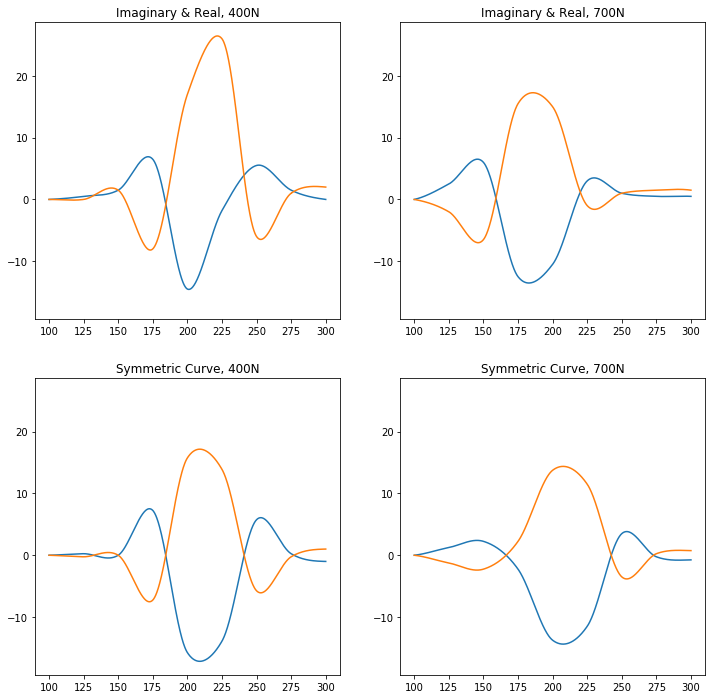

In [29]:
#Create subplots of the raw and symmetric data for 400N and 700N
plt.figure(figsize=(12,12))

ax0=plt.subplot(221)
x0,y0=zip(*CatmullRomChain(im_400))
plt.plot(x0,y0)
x1,y1=zip(*CatmullRomChain(re_400))
plt.plot(x1,y1)
plt.title('Imaginary & Real, 400N')

ax1=plt.subplot(222,sharey=ax0)
x2,y2=zip(*CatmullRomChain(im_700))
plt.plot(x2,y2)
x3,y3=zip(*CatmullRomChain(re_700))
plt.plot(x3,y3)
plt.title('Imaginary & Real, 700N')

ax2=plt.subplot(223,sharey=ax0)
x4,y4=zip(*CatmullRomChain(med_400))
plt.plot(x4,y4)
x5,y5=x4,-1*np.array(y4)
plt.plot(x5,y5)
plt.title('Symmetric Curve, 400N')

ax3=plt.subplot(224,sharey=ax0)
x6,y6=zip(*CatmullRomChain(med_700))
plt.plot(x6,y6)
x7,y7=x6,-1*np.array(y6)
plt.plot(x7,y7)
plt.title('Symmetric Curve, 700N')


In [9]:
#Create LineString objects out of each of the plotted curves
line0=LineString(np.transpose(np.array([x0,y0])))
line1=LineString(np.transpose(np.array([x1,y1])))
line2=LineString(np.transpose(np.array([x2,y2])))
line3=LineString(np.transpose(np.array([x3,y3])))
line4=LineString(np.transpose(np.array([x4,y4])))
line5=LineString(np.transpose(np.array([x5,y5])))
line6=LineString(np.transpose(np.array([x6,y6])))
line7=LineString(np.transpose(np.array([x7,y7])))

In [10]:
#Print the coordinates of the intersection points for each pair of curves
print('400 Raw: '+line0.intersection(line1).wkt)
print('700 Raw: '+line2.intersection(line3).wkt)
print('400 Symmetric: '+line4.intersection(line5).wkt)
print('700 Symmetric: '+line6.intersection(line7).wkt)

400 Raw: MULTIPOINT (100 0, 132.2473988433448 0.6358550713705202, 150 1.5, 184.4563151813285 -0.7888452018400079, 240.9030252990246 3.907113099232082, 277.0160857720188 1.289852607751654)
700 Raw: MULTIPOINT (100 0, 159.0456135311209 0.2107785793801913, 219.9970696911267 1.181803590559451, 250 1)
400 Symmetric: MULTIPOINT (100 0, 132.2054194462325 0, 150 0, 184.3572642578207 0, 241.0123773960759 0, 277.0110880200208 0)
700 Symmetric: MULTIPOINT (100 0, 159.0416762498833 0, 219.9995205523607 0, 250 0)


In [11]:
#Create Polygon objects out of the lobes on either side of the center and print their areas
#Left, 400N
area0=[[tuple(a) for a in np.transpose(np.array([x0,y0]))[bisect.bisect(x0,150):bisect.bisect(x0,184.4563151813285)]],
[tuple(a) for a in np.transpose(np.array([x1,y1]))[bisect.bisect(x1,150):bisect.bisect(x1,184.4563151813285)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area0))).area)

#Right
area1=[[tuple(a) for a in np.transpose(np.array([x0,y0]))[bisect.bisect(x0,240.9030252990246):bisect.bisect(x0,277.0160857720188)]],
[tuple(a) for a in np.transpose(np.array([x1,y1]))[bisect.bisect(x1,240.9030252990246):bisect.bisect(x1,277.0160857720188)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area1))).area)

298.8464544583992
245.1942909907392


In [12]:
#Left, 700N
area0=[[tuple(a) for a in np.transpose(np.array([x2,y2]))[bisect.bisect(x2,100):bisect.bisect(x2,159.0456135311209 )]],
[tuple(a) for a in np.transpose(np.array([x3,y3]))[bisect.bisect(x3,100):bisect.bisect(x3,159.0456135311209 )]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area0))).area)

#Right
area2=[[tuple(a) for a in np.transpose(np.array([x2,y2]))[bisect.bisect(x2,219.9970696911267):bisect.bisect(x2,250)]],
[tuple(a) for a in np.transpose(np.array([x3,y3]))[bisect.bisect(x3,219.9970696911267):bisect.bisect(x3,250)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area2))).area)

365.6164637264152
89.38146424598777


In [13]:
#Left, symmetric 400
area0=[[tuple(a) for a in np.transpose(np.array([x4,y4]))[bisect.bisect(x4,150):bisect.bisect(x4,184.3572642578207)]],
[tuple(a) for a in np.transpose(np.array([x5,y5]))[bisect.bisect(x5,150):bisect.bisect(x5,184.3572642578207)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area0))).area)

#Right, symmetric 400
area2=[[tuple(a) for a in np.transpose(np.array([x4,y4]))[bisect.bisect(x4,241.0123773960759):bisect.bisect(x4,277.0110880200208)]],
[tuple(a) for a in np.transpose(np.array([x5,y5]))[bisect.bisect(x5,241.0123773960759):bisect.bisect(x5,277.0110880200208)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area2))).area)

298.2723486788354
247.4153169491708


In [14]:
#Left, symmetric 700
area0=[[tuple(a) for a in np.transpose(np.array([x6,y6]))[bisect.bisect(x6,100):bisect.bisect(x6,159.0416762498833)]],
[tuple(a) for a in np.transpose(np.array([x7,y7]))[bisect.bisect(x7,100):bisect.bisect(x7,159.0416762498833)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area0))).area)

#Right, symmetric 700
area2=[[tuple(a) for a in np.transpose(np.array([x6,y6]))[bisect.bisect(x6,219.9995205523607):bisect.bisect(x6,250)]],
[tuple(a) for a in np.transpose(np.array([x7,y7]))[bisect.bisect(x7,219.9995205523607):bisect.bisect(x7,250)]][::-1]]
print(Polygon(list(itertools.chain.from_iterable(area2))).area)

365.65498925546376
89.41925434963633


In [15]:
#Calculate the ratio of the areas for each pair
print('Raw 400N: '+str(245.1942909907392/298.8464544583992))
print('Raw 700N: '+str(89.38146424598777/365.6164637264152))
print('Symmetric 400N: '+str(247.4153169491708/298.2723486788354))
print('Symmetric 700N: '+str(89.41925434963633/365.65498925546376))

Raw 400N: 0.8204691316653093
Raw 700N: 0.2444678320418045
Symmetric 400N: 0.829494648247046
Symmetric 700N: 0.24454542390275943
